# Justin Park

## Section 1: Loading and processing the data

In this section you will load the data from the file `UCI_Credit_Card.csv` and process it appropriately. You will also perform the train-test split in this section. The train-test split we want you to use is 80% for training and 20% for testing.

**Explanation**: Load the data into a dataframe and normalize each feature so that values are between -0.5 and 0.5. Then, create separate lists to store features and labels. ID is not included because it is an irrelevant feature. Using the sklearn.model_selection library, we will randomly split the data between training and testing data in an 80/20 ratio respectively.

In [1]:
import pandas as pd

# Load the data into a dataframe
df = pd.read_csv('UCI_Credit_Card.csv')
df[df.columns] = df[df.columns].astype(float)

# Normalize all the values between -1 and 1 as discussed in class
for feature in df.columns[:-1]:
    max_value = df[feature].max()
    min_value = df[feature].min()
    mean_value = df[feature].mean()
    df[feature] = (df[feature] - mean_value) / (max_value - min_value)
    
# Display the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,-0.500000,-0.148974,0.396267,0.024478,-0.183956,-0.198026,0.20167,0.213377,-0.08338,-0.077933,...,-0.040753,-0.039971,-0.029872,-0.006483,-0.003107,-0.005832,-0.007771,-0.011252,-0.009865,1.0
1,-0.499967,-0.047964,0.396267,0.024478,0.149378,-0.163543,-0.09833,0.213377,0.01662,0.022067,...,-0.037671,-0.036546,-0.027366,-0.006483,-0.002922,-0.004716,-0.006161,-0.011252,-0.006082,1.0
2,-0.499933,-0.078267,0.396267,0.024478,0.149378,-0.025612,0.00167,0.013377,0.01662,0.022067,...,-0.027254,-0.025150,-0.017923,-0.004746,-0.002625,-0.004716,-0.006161,-0.008908,-0.000408,0.0
3,-0.499900,-0.118671,0.396267,0.024478,-0.183956,0.026112,0.00167,0.013377,0.01662,0.022067,...,-0.014082,-0.011257,-0.007166,-0.004194,-0.002317,-0.004493,-0.006000,-0.008746,-0.007974,0.0
4,-0.499867,-0.118671,-0.603733,0.024478,-0.183956,0.370940,-0.09833,0.013377,-0.08338,0.022067,...,-0.021028,-0.020987,-0.015170,-0.004194,0.018263,0.005328,0.006721,-0.009637,-0.008581,0.0


In [2]:
class Example:
    """
    Class to represent a data example.
    """
    
    def __init__(self, features, label):
        """
        Create a new example.
        
        :param feature: The real valued features of patient (list)
        :param label: The label (0 / 1) of the example
        """
        self.features = features
        self.label = label

In [3]:
# Store data examples
data = []

# Populate data with each data example excluding the ID feature
for row in df.itertuples():
    features = row[2:-1]
    label = row[-1]
    example = Example(features, label)
    data.append(example)

# Get features and labels from data
X = [example.features for example in data]
y = [example.label for example in data]

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the train/test data in an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert the lists to np arrays
X_train = np.array(X_train);
X_test = np.array(X_test);
y_train = np.array(y_train);
y_test = np.array(y_test);

## Section 2: Building the model

In this section you will write all the code to build your model in Keras. The model should output a single number between 0 and 1 which is the probability which represents whether the individual will default or not.

**Explanation**: Create a sequential model consisting of 3 dense layers. The model takes 24 features as input and outputs a single probability of confidence of whether the customer will default on their next payment or not. The model has two hidden layers with 36 and 18 nodes respectively which should be large enough to capture and learn the structure of the input.

In [5]:
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model with 3 layers which outputs a single node
model = Sequential()
model.add(Dense(36, input_dim=23, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

/home/justin/.virtualenvs/cmsc389a/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                864       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                666       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 19        
Total params: 1,549
Trainable params: 1,549
Non-trainable params: 0
_________________________________________________________________


## Section 3: Training the model

In this section you will write all the coded needed to train your model on the data from Section 0. Make sure you **dont** train the model on the data you will test on!

**Explanation**: After experimenting with different model architectures, I have decided with the one created above. Accuracy levels off at around 82.5% so it seems 50 epochs are sufficient for training. I used a batch size of 50 to allow for faster training over a large number of epochs. I have also included a validation_split to allow for a more detailed analysis of the accuracy of the model over time later.

In [6]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=50)

Train on 16079 samples, validate on 7921 samples
Epoch 1/50
16079/16079 [==============================] - 1s 37us/step - loss: 0.5075 - acc: 0.7898 - val_loss: 0.4675 - val_acc: 0.8051
Epoch 2/50
16079/16079 [==============================] - 0s 31us/step - loss: 0.4491 - acc: 0.8103 - val_loss: 0.4540 - val_acc: 0.8125
Epoch 3/50
16079/16079 [==============================] - 1s 32us/step - loss: 0.4426 - acc: 0.8147 - val_loss: 0.4515 - val_acc: 0.8119
Epoch 4/50
16079/16079 [==============================] - 1s 32us/step - loss: 0.4405 - acc: 0.8162 - val_loss: 0.4485 - val_acc: 0.8181
Epoch 5/50
16079/16079 [==============================] - 0s 30us/step - loss: 0.4387 - acc: 0.8177 - val_loss: 0.4494 - val_acc: 0.8167
Epoch 6/50
16079/16079 [==============================] - 0s 30us/step - loss: 0.4371 - acc: 0.8177 - val_loss: 0.4468 - val_acc: 0.8164
Epoch 7/50
16079/16079 [==============================] - 0s 31us/step - loss: 0.4361 - acc: 0.8189 - val_loss: 0.4458 - val_acc:

## Section 4: Testing the model and results

In this section you will compute the accuracy of your model on the test data from Section 0. Make sure you very clearly have a cell that outputs and prints the percentage accuracy of your model. You will also include any code used to analyze the results here.

**Explanation**: Evaluate the testing data to determine the model's accuracy on the testing data. Use a validation set to visualize the training loss overtime. Since the validation data stays at the same accuracy over time, I have determined that the model has reached its peak accuracy.

In [7]:
scores = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 82.48%


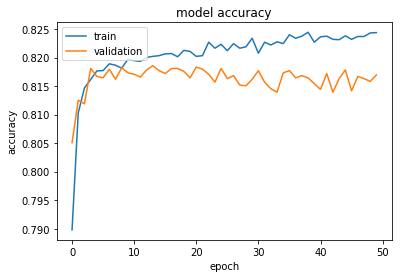

In [8]:
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

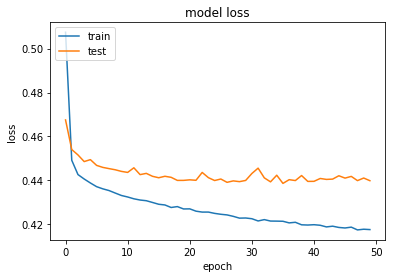

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()